In [1]:
from qiskit import *
from qiskit.visualization import *
import numpy as np
from qiskit.tools.monitor import *
from qiskit.quantum_info import *
from qiskit.extensions import *
from qiskit_experiments.framework import *
from qiskit_experiments.library import *
from qiskit.test.mock import *
from qiskit.providers.aer import *

In [2]:
 sent = Initialize(random_statevector(2))

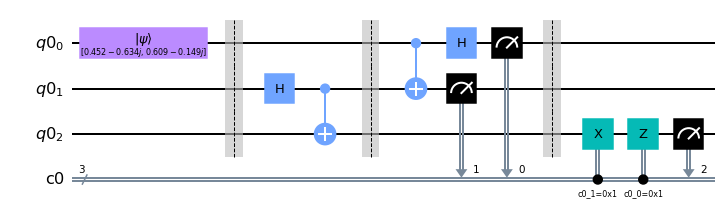

In [3]:
#measures received state
circuit_1 = QuantumCircuit(QuantumRegister(3), ClassicalRegister(3))
circuit_1.append(sent, [0])
circuit_1.barrier()
circuit_1.h(1)
circuit_1.cx(1, 2)
circuit_1.barrier()
circuit_1.cx(0, 1)
circuit_1.h(0)
circuit_1.measure(0, 0)
circuit_1.measure(1, 1)
circuit_1.barrier()
circuit_1.x(2).c_if(1, 1)
circuit_1.z(2).c_if(0, 1)
circuit_1.measure(2, 2)
circuit_1.draw()

In [4]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito')

In [5]:
job_1 = execute(circuit_1, backend = backend, shots = 1024)
counts_1 = job_1.result().get_counts()
plot_histogram(counts_1)

IBMQJobFailureError: 'Unable to retrieve result for job 62f9bfd3658c1c12b381b442. Job has failed: Instruction bfunc is not supported. Error code: 7001.'